In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import livelossplot

In [2]:
df = pd.read_csv("HR Employee Attrition.csv", na_values='?')

In [3]:
df.shape

(1470, 35)

In [4]:
df = df.dropna()

In [5]:
df.shape

(1470, 35)

In [6]:
lb = LabelEncoder()
df['EducationField'] = lb.fit_transform(df['EducationField'])
df['BusinessTravel'] = lb.fit_transform(df['BusinessTravel'])
df['Attrition'] = lb.fit_transform(df['Attrition'])
df['Department'] = lb.fit_transform(df['Department'])
df['Gender'] = lb.fit_transform(df['Gender'])
df['JobRole'] = lb.fit_transform(df['JobRole'])
df['MaritalStatus'] = lb.fit_transform(df['MaritalStatus'])
df['OverTime'] = lb.fit_transform(df['OverTime'])
df['Over18'] = lb.fit_transform(df['Over18'])

In [7]:
d = df.drop(['Attrition'], axis=1)

In [8]:
d.shape

(1470, 34)

In [9]:
scaler = StandardScaler()
s_df = scaler.fit_transform(df.drop('Attrition', axis=1))
X = s_df
Y = df['Attrition']

In [10]:
Y = to_categorical(Y)
Y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1029, 34) (441, 34) (1029, 2) (441, 2)


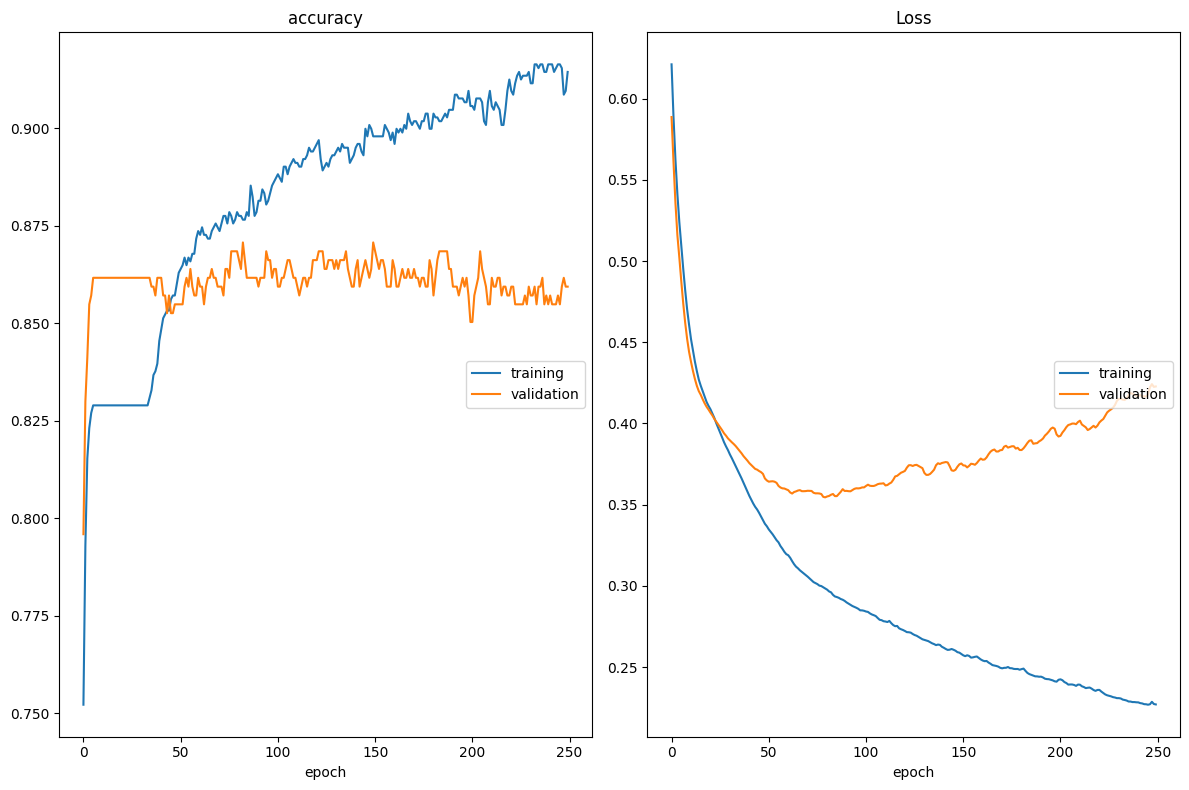

accuracy
	training         	 (min:    0.752, max:    0.916, cur:    0.914)
	validation       	 (min:    0.796, max:    0.871, cur:    0.859)
Loss
	training         	 (min:    0.227, max:    0.621, cur:    0.227)
	validation       	 (min:    0.354, max:    0.589, cur:    0.423)
9/9 [==============================] - 0s 33ms/step - loss: 0.2270 - accuracy: 0.9145 - val_loss: 0.4228 - val_accuracy: 0.8594
Test Loss Score: 0.4227714240550995
Test Accuracy Score: 0.8594104051589966


In [29]:
# Building a three-layer feedforward neural network

model1 = Sequential()
model1.add(Dense(input_dim =34,units = 8, activation='relu'))  
model1.add(Dense(units=16, activation='relu'))
model1.add(Dense(units=2, activation='sigmoid'))

# Compiling model1

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Live training loss plot

PlotLosses1 = livelossplot.PlotLossesKeras()                       

# Training model1

model1.fit(X_train, y_train, batch_size = 128, epochs = 250, callbacks=[PlotLosses1], verbose=1, validation_data=(X_test, y_test))

score = model1.evaluate(X_test, y_test, verbose=0)

# Display both loss and accuracy

print("Test Loss Score:", score[0])
print("Test Accuracy Score:", score[1])

In [30]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 280       
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 458
Trainable params: 458
Non-trainable params: 0
_________________________________________________________________


In [67]:
y_pred1 = model1.predict(X_test, verbose=0)
y_preds1 =np.argmax(y_pred1, axis=1)
y_tests1 =np.argmax(y_test, axis=1)

In [68]:
print("Accuracy: ", accuracy_score(y_tests1, y_preds1))
print("Precision: ", precision_score(y_tests1, y_preds1))
print("F1 Score: ", f1_score(y_tests1, y_preds1))
print("Confusion matrix: \n", confusion_matrix(y_tests1, y_preds1))

Accuracy:  0.8594104308390023
Precision:  0.48484848484848486
F1 Score:  0.34042553191489355
Confusion matrix: 
 [[363  17]
 [ 45  16]]


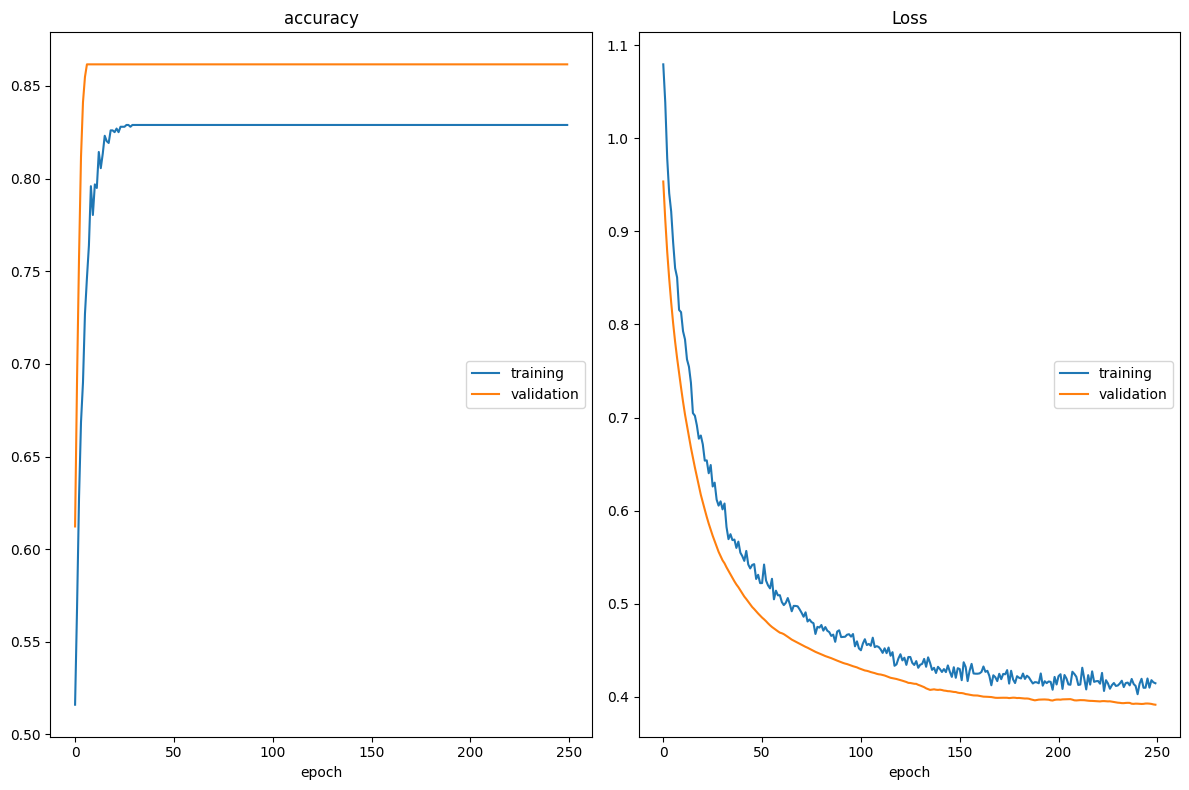

accuracy
	training         	 (min:    0.516, max:    0.829, cur:    0.829)
	validation       	 (min:    0.612, max:    0.862, cur:    0.862)
Loss
	training         	 (min:    0.403, max:    1.079, cur:    0.415)
	validation       	 (min:    0.392, max:    0.953, cur:    0.392)
9/9 [==============================] - 0s 38ms/step - loss: 0.4146 - accuracy: 0.8290 - val_loss: 0.3916 - val_accuracy: 0.8617
Test Loss Score: 0.3915669023990631
Test Accuracy Score: 0.8616780042648315


In [33]:
# Building a three-layer feedforward neural network with l2 regularization and dropout

model2 = Sequential()
model2.add(Dense(units = 8, activation = 'relu', input_dim = 34, kernel_regularizer = 'l2'))                  
model2.add(Dropout(0.5))
model2.add(Dense(units = 16, activation = 'relu', kernel_regularizer = 'l2'))
model2.add(Dropout(0.25))
model2.add(Dense(units = 2, activation = 'sigmoid', kernel_regularizer = 'l2'))

# Compiling the model2

model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

PlotLosses2 = livelossplot.PlotLossesKeras()

# Training the model2

model2.fit(X_train, y_train, batch_size = 128, epochs = 250, callbacks=[PlotLosses2], verbose = 1, validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose = 0)

# Display both loss and accuracy

print('Test Loss Score:', score[0])
print('Test Accuracy Score:', score[1])

In [15]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 280       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 458
Trainable params: 458
Non-trainable params: 0
_________________________________________________________________


In [69]:
y_pred2 = model2.predict(X_test, verbose=0)
y_preds2 =np.argmax(y_pred2, axis=1)
y_tests2 =np.argmax(y_test, axis=1)

In [71]:
print("Accuracy: ", accuracy_score(y_tests2, y_preds2))
print("Precision: ", precision_score(y_tests2, y_preds2))
print("F1 Score: ", f1_score(y_tests2, y_preds2))
print("Confusion matrix: \n", confusion_matrix(y_tests2, y_preds2))

Accuracy:  0.8616780045351474
Precision:  0.0
F1 Score:  0.0
Confusion matrix: 
 [[380   0]
 [ 61   0]]


c:\Users\Janmejay Mohanty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


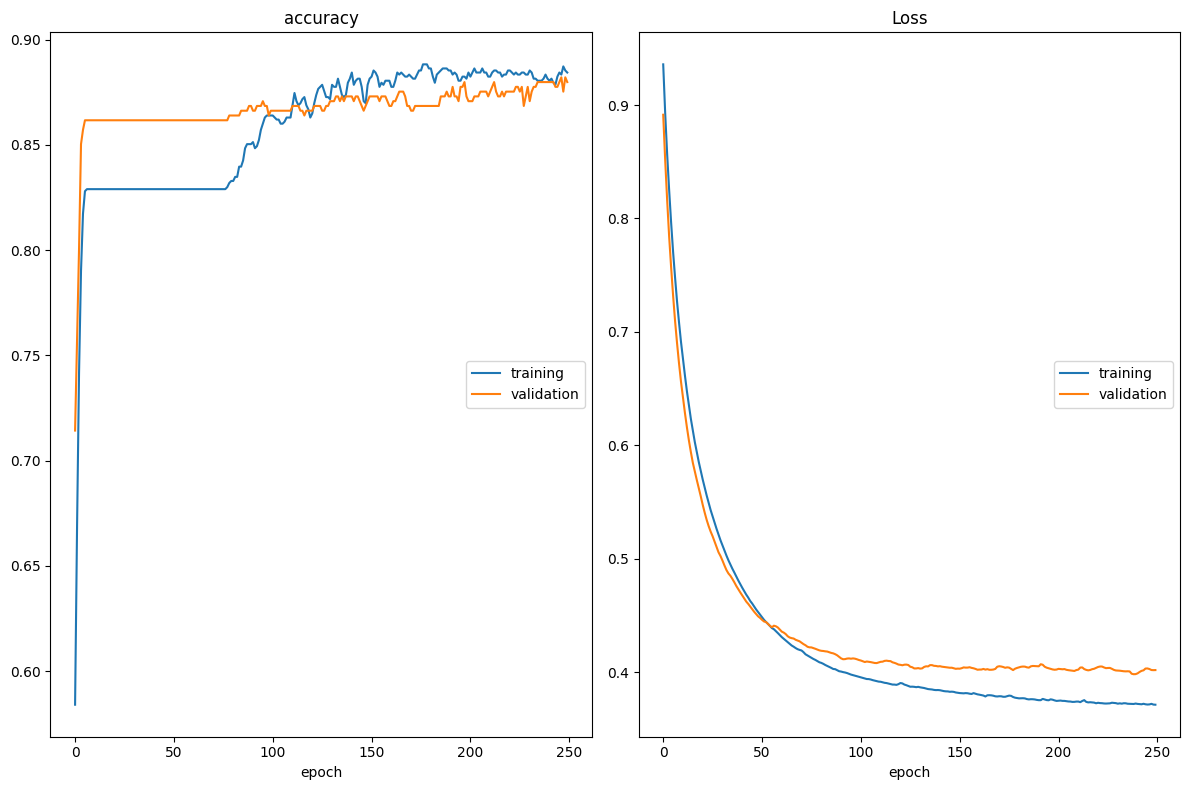

accuracy
	training         	 (min:    0.584, max:    0.888, cur:    0.884)
	validation       	 (min:    0.714, max:    0.882, cur:    0.880)
Loss
	training         	 (min:    0.371, max:    0.936, cur:    0.371)
	validation       	 (min:    0.398, max:    0.891, cur:    0.402)
9/9 [==============================] - 0s 32ms/step - loss: 0.3712 - accuracy: 0.8844 - val_loss: 0.4018 - val_accuracy: 0.8798
Test Loss Score: 0.40177398920059204
Test Accuracy Score: 0.8798186182975769


In [34]:
# Building a three-layer feedforward neural network with l2 regularization and without dropout

model3 = Sequential()
model3.add(Dense( activation = 'relu', units = 8, input_dim = 34, kernel_regularizer = 'l2'))                 
model3.add(Dense( activation = 'relu', units = 16, kernel_regularizer = 'l2'))
model3.add(Dense( activation = 'sigmoid', units = 2, kernel_regularizer = 'l2'))

# Compiling model2

model3.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Live training loss plot

PlotLosses3 = livelossplot.PlotLossesKeras()

# Training the model2

model3.fit(X_train, y_train, batch_size = 128, epochs = 250, callbacks = [PlotLosses3], verbose = 1, validation_data = (X_test, y_test))

score = model3.evaluate(X_test, y_test, verbose = 0)

# Display both loss and accuracy

print('Test Loss Score:', score[0])
print('Test Accuracy Score:', score[1])

In [35]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 280       
                                                                 
 dense_10 (Dense)            (None, 16)                144       
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 458
Trainable params: 458
Non-trainable params: 0
_________________________________________________________________


In [72]:
y_pred3 = model3.predict(X_test, verbose=0)
y_preds3 =np.argmax(y_pred3, axis=1)
y_tests3 =np.argmax(y_test, axis=1)

In [73]:
print("Accuracy: ", accuracy_score(y_tests3, y_preds3))
print("Precision: ", precision_score(y_tests3, y_preds3))
print("F1 Score: ", f1_score(y_tests3, y_preds3))
print("Confusion matrix: \n", confusion_matrix(y_tests3, y_preds3))

Accuracy:  0.8798185941043084
Precision:  0.75
F1 Score:  0.3116883116883117
Confusion matrix: 
 [[376   4]
 [ 49  12]]
